In [6]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from PIL import Image
import seaborn as sns
import cv2
import warnings
warnings.filterwarnings("ignore")
tf.compat.v1.set_random_seed(0)
from tensorflow import keras

In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

Num GPUs Available:  2
Num CPUs Available:  1


In [9]:
#data path
BASE_DIR = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

test_dir = os.path.join(BASE_DIR, 'valid')
train_dir = os.path.join(BASE_DIR, 'train')

train_class_dir = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
test_class_dir = [os.path.join(test_dir, d) for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

train_image_paths = []
test_image_paths = []
for class_dir in train_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)

for class_dir in test_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            test_image_paths.append(image_path)


train_labels = [os.path.basename(class_dir) for class_dir in train_class_dir]
test_labels = [os.path.basename(class_dir) for class_dir in test_class_dir]

In [10]:
classes_train = os.listdir(train_dir)
classes_train

['Tomato___Late_blight',
 'Tomato___healthy',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Potato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Strawberry___Leaf_scorch',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Apple___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Common_rust_',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy'

In [11]:
# Parameters
img_size = (224, 224)
batch_size = 64

# Data augmentation and generators
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_data.flow_from_directory(
    train_dir,
    img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_data = ImageDataGenerator(rescale=1./255)
validation_generator = val_data.flow_from_directory(
    test_dir,
    img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [14]:
class_directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
num_classes = len(class_directories)
num_classes

38

In [7]:
model = models.Sequential()
# First Convolutional Layer with MaxPooling (L2 Regularization)
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape = (224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
# Second Convolutional Layer with Batch Normalization and MaxPooling (L2 Regularization)
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(BatchNormalization())

model.add(layers.Conv2D(128, (3,3), activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001), padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001), padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=keras.regularizers.l2(0.001), padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

# Print model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 111, 111, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073,254 (4.09 MB)

 Trainable params: 1,072,998 (4.09 MB)

 Non-trainable params: 256 (1.00 KB)

None


In [16]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
checkpointer = ModelCheckpoint(filepath="weights.best.keras", verbose=0, save_best_only=True) # save best model

In [18]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, verbose=1, mode='auto')


In [10]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), metrics=["accuracy",'precision','recall'])
model.save('./Task_CNN.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 111, 111, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073,254 (4.09 MB)

 Trainable params: 1,072,998 (4.09 MB)

 Non-trainable params: 256 (1.00 KB)

In [11]:
epochs = 15

history_CNN = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[monitor, checkpointer],
    shuffle=True
)

Epoch 1/15


I0000 00:00:1729926716.633569     115 service.cc:145] XLA service 0x78a44c007c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729926716.633625     115 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729926716.633629     115 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1729926734.490382     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1099/1099 ━━━━━━━━━━━━━━━━━━━━ 1236s 1s/step - accuracy: 0.1848 - loss: 3.1822 - precision: 0.6005 - recall: 0.0678 - val_accuracy: 0.4084 - val_loss: 2.7169 - val_precision: 0.5159 - val_recall: 0.3453
Epoch 2/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 971s 834ms/step - accuracy: 0.6501 - loss: 1.2768 - precision: 0.7939 - recall: 0.5171 - val_accuracy: 0.7363 - val_loss: 1.0463 - val_precision: 0.8043 - val_recall: 0.6770
Epoch 3/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 865s 782ms/step - accuracy: 0.7719 - loss: 0.8887 - precision: 0.8559 - recall: 0.6955 - val_accuracy: 0.8195 - val_loss: 0.7320 - val_precision: 0.8666 - val_recall: 0.7844
Epoch 4/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 869s 785ms/step - accuracy: 0.8281 - loss: 0.7156 - precision: 0.8812 - recall: 0.7763 - val_accuracy: 0.8564 - val_loss: 0.6207 - val_precision: 0.8935 - val_recall: 0.8243
Epoch 5/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 861s 778ms/step - accuracy: 0.8598 - loss: 0.6192 - precision: 0.9021 - recall: 0.8225 - val_accuracy: 0.78

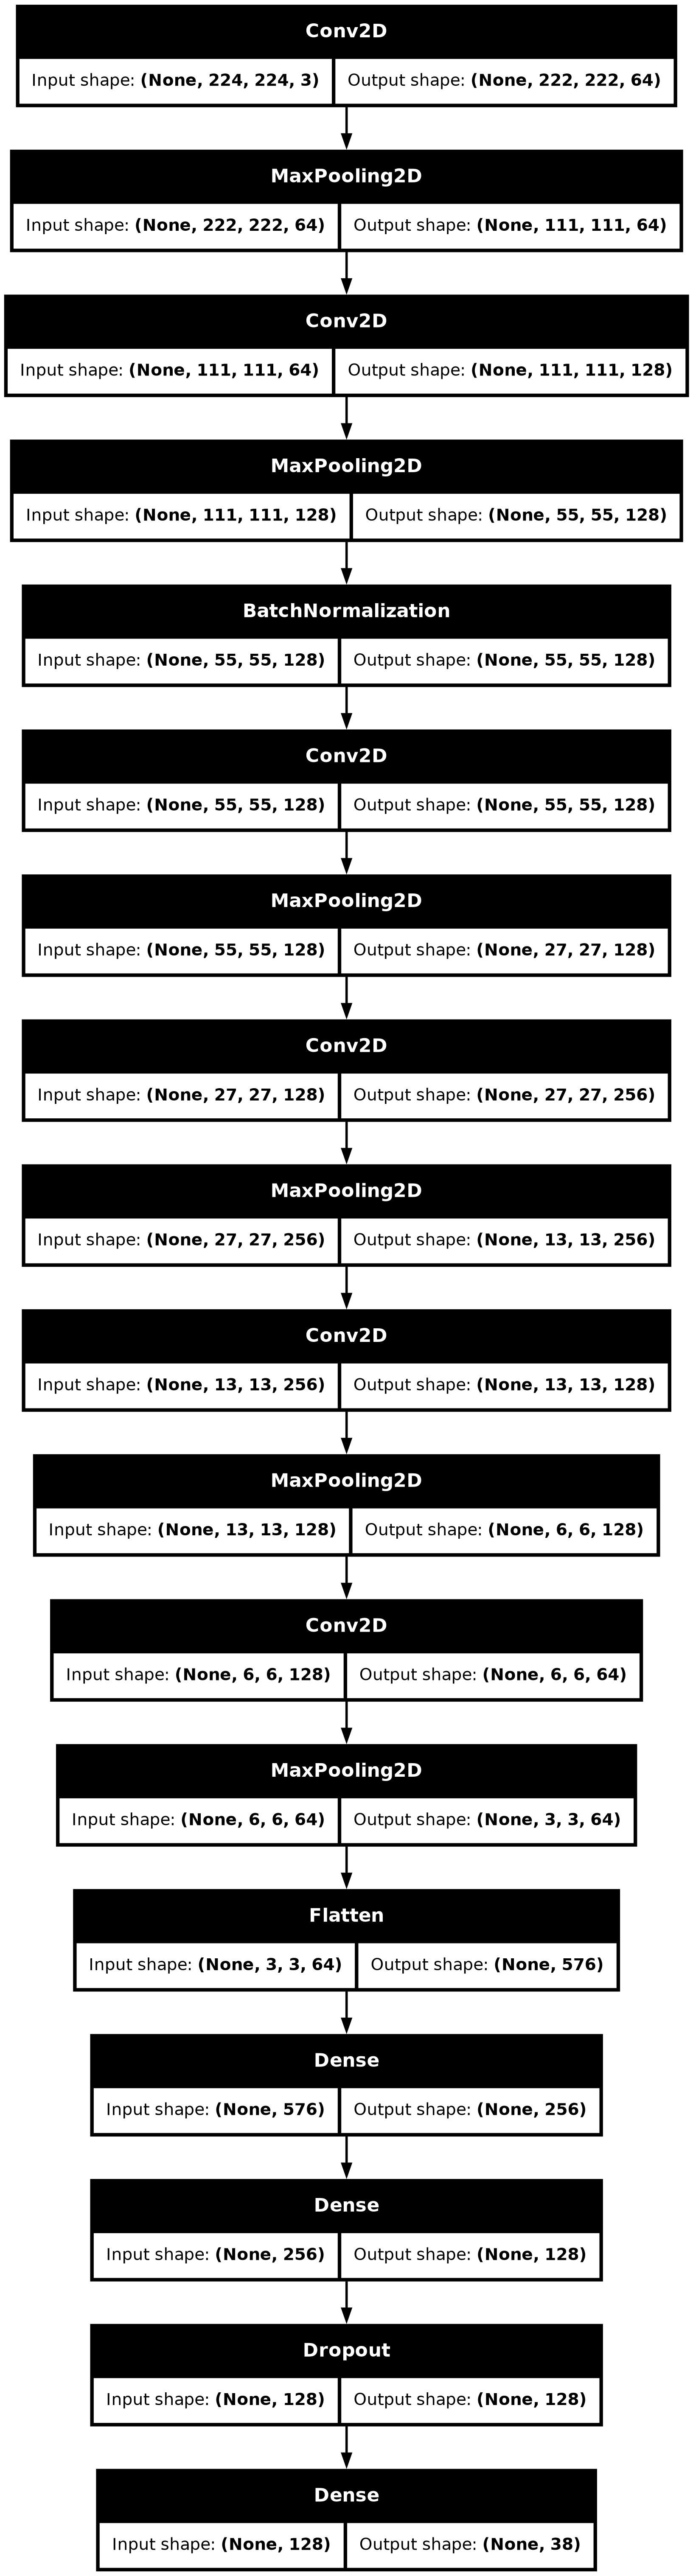

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

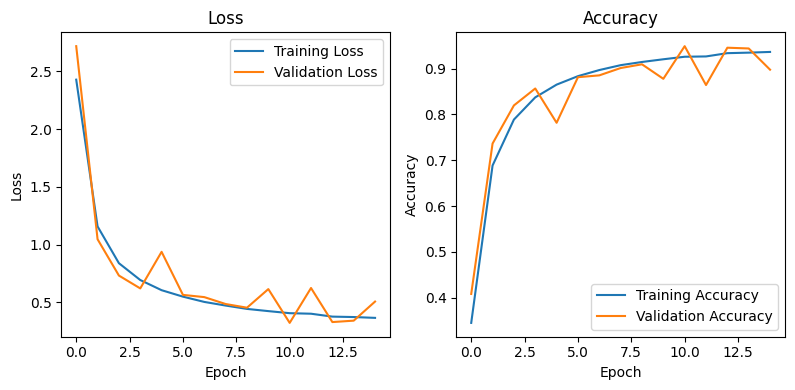

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history_CNN.history['loss'], label='Training Loss')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
num_classes = len(class_directories)
input_shape = (224, 224, 3)

inputs = tf.keras.Input(shape=input_shape)
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=inputs)
# Freeze the base model layers
base_model.trainable = False

# Add pooling layer directly on top of base model
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

# Add Dense layers with Batch Normalization and Dropout
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)  # Updated dropout for simpler regularization
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

# Output layer
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create model
model_VGG16 = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Compile the model with a learning rate scheduler
optimizer = Adam(learning_rate=0.001)
model_VGG16.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy", 'precision', 'recall'])

# Display summary
model_VGG16.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,89

 Total params: 14,885,350 (56.78 MB)

 Trainable params: 169,894 (663.65 KB)

 Non-trainable params: 14,715,456 (56.14 MB)

In [20]:
# Training the model
history_VGG16 = model_VGG16.fit(
                    train_generator,
                    epochs = 12,
                    validation_data = validation_generator,
                    callbacks=[monitor, checkpointer]
                    )


Epoch 1/12


I0000 00:00:1729946622.511082     643 service.cc:145] XLA service 0x7c75b000bb90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729946622.511133     643 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729946622.511136     643 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1729946646.140488     643 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1099/1099 ━━━━━━━━━━━━━━━━━━━━ 1127s 996ms/step - accuracy: 0.6465 - loss: 1.2644 - precision: 0.8509 - recall: 0.4811 - val_accuracy: 0.8026 - val_loss: 0.6399 - val_precision: 0.8560 - val_recall: 0.7683
Epoch 2/12
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 1080s 976ms/step - accuracy: 0.8509 - loss: 0.4665 - precision: 0.8991 - recall: 0.8077 - val_accuracy: 0.8783 - val_loss: 0.3754 - val_precision: 0.9076 - val_recall: 0.8549
Epoch 3/12
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 1067s 965ms/step - accuracy: 0.8664 - loss: 0.4065 - precision: 0.9042 - recall: 0.8342 - val_accuracy: 0.8973 - val_loss: 0.2990 - val_precision: 0.9242 - val_recall: 0.8780
Epoch 4/12
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 1067s 965ms/step - accuracy: 0.8773 - loss: 0.3704 - precision: 0.9097 - recall: 0.8507 - val_accuracy: 0.8914 - val_loss: 0.3148 - val_precision: 0.9176 - val_recall: 0.8727
Epoch 5/12
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 1076s 973ms/step - accuracy: 0.8823 - loss: 0.3513 - precision: 0.9125 - recall: 0.8575 - val_accurac

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history_VGG16.history['loss'], label='Training Loss')
plt.plot(history_VGG16.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_VGG16.history['accuracy'], label='Training Accuracy')
plt.plot(history_VGG16.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Extracting final epoch metrics
cnn_metrics = history_CNN.history
vgg16_metrics = history_VGG16.history

# Create a DataFrame for comparison
data = {
    'Model': ['CNN', 'VGG16 (Transfer Learning)'],
    'Accuracy train': [cnn_metrics['accuracy'][-1], vgg16_metrics['accuracy'][-1]],
    'Accuracy test': [cnn_metrics['val_accuracy'][-1], vgg16_metrics['val_accuracy'][-1]],
    'Precision train': [cnn_metrics['precision'][-1], vgg16_metrics['precision'][-1]],
    'Precision test': [cnn_metrics['val_precision'][-1], vgg16_metrics['val_precision'][-1]],
    'Recall train': [cnn_metrics['recall'][-1], vgg16_metrics['recall'][-1]],
    'Recall test': [cnn_metrics['val_recall'][-1], vgg16_metrics['val_recall'][-1]]
}

comparison_df = pd.DataFrame(data)
print(comparison_df)